In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt

In [3]:
df= pd.read_csv('titanic.csv')

In [4]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
# we need to replace the missing vales in Age col with the average value of the people, grouping the data: survived or
# not survived.

In [7]:
df['Pclass'].unique()

array([3, 1, 2], dtype=int64)

In [8]:
import seaborn as sns

<AxesSubplot:xlabel='Survived', ylabel='count'>

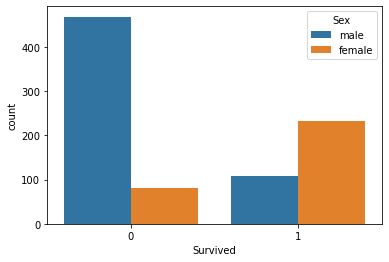

In [9]:
sns.countplot(x = 'Survived', hue = 'Sex', data = df)

<AxesSubplot:xlabel='Survived', ylabel='count'>

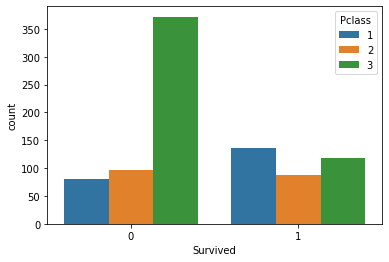

In [10]:
sns.countplot(x = 'Survived', hue = 'Pclass', data = df)

In [11]:
# counting the average age in all the classes, and replacing those values. 

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

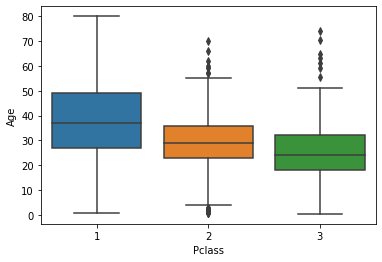

In [12]:
sns.boxplot(x = 'Pclass', y = 'Age', data = df)

In [13]:
# average ages class wise:
# Pclass 1: 38 years
# Pclass 2: 29 years
# Pclass 3: 25 years

In [14]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        
        if Pclass==1:
            return 38
        
        elif Pclass==2:
            return 29
        
        else:
            return 25
        
    else:
        return Age

In [15]:
df['Age'] = df[['Age','Pclass']].apply(impute_age, axis=1)

In [16]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [17]:
# handling the Embarked column:

df['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [18]:
df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [19]:
df['Embarked'] = df['Embarked'].fillna('S')

In [20]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [21]:
# handling the Cabin column:

df['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

<AxesSubplot:xlabel='Survived', ylabel='Cabin'>

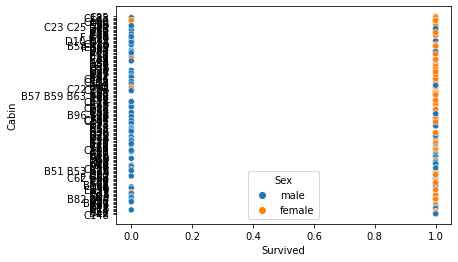

In [22]:
sns.scatterplot(x = 'Survived', y = 'Cabin', hue = 'Sex', data = df)

In [23]:
# i want to know the cabin having the max no. of deaths of male. How to do that? 

In [24]:
# Filter the dataset to include only male passengers who did not survive
male_deaths_df = df[(df['Sex'] == 'male') & (df['Survived'] == 0)]

In [25]:
male_deaths_df.shape

(468, 12)

In [26]:
# Group the filtered dataset by Cabin and count the number of male passengers who did not survive in each cabin
cabin_deaths_count = male_deaths_df.groupby('Cabin')['PassengerId'].count()

In [27]:
# Sort the groups in descending order based on the count of male passengers who did not survive
cabin_deaths_count = cabin_deaths_count.sort_values(ascending=False)

In [28]:
cabin_deaths_count

Cabin
C23 C25 C27    2
F G73          2
C124           2
D26            2
A10            1
D46            1
C78            1
C82            1
C83            1
C86            1
C87            1
C91            1
C95            1
D              1
D30            1
D48            1
C65            1
D50            1
D6             1
E31            1
E38            1
E44            1
E46            1
E58            1
E63            1
E67            1
F G63          1
F2             1
F38            1
C68            1
C46            1
A14            1
B38            1
A19            1
A24            1
A32            1
A36            1
A5             1
A7             1
B102           1
B19            1
B22            1
B30            1
B37            1
B51 B53 B55    1
C30            1
B58 B60        1
B71            1
B82 B84        1
B86            1
B94            1
C110           1
C111           1
C118           1
C123           1
C128           1
C2             1
T              1
Name: Pa

In [29]:
# Take the first group, which will be the cabin with the maximum number of deaths of male passengers
max_deaths_cabin = cabin_deaths_count.index[0]

In [30]:
# counting for females:

female_deaths_df = df[(df['Sex'] == 'female') & (df['Survived'] == 0)]

In [31]:
female_deaths_df.shape

(81, 12)

In [32]:
death_count = female_deaths_df.groupby('Cabin')['PassengerId'].count()

In [33]:
death_count

Cabin
C22 C26    2
C49        1
E77        1
G6         2
Name: PassengerId, dtype: int64

In [34]:
# plotting the graphs:

<AxesSubplot:xlabel='Survived', ylabel='count'>

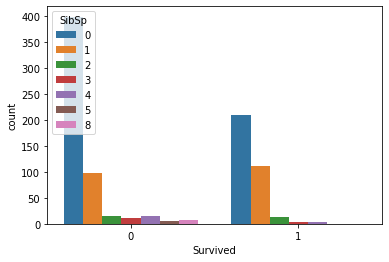

In [35]:
sns.countplot(x = 'Survived', hue = 'SibSp', data = df)

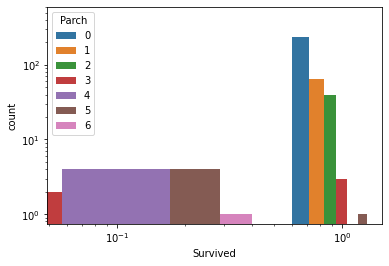

In [36]:
sns.countplot(x = 'Survived', hue = 'Parch', data = df)
plt.xscale('log')
plt.yscale('log')

In [74]:
df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.035388,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.050118,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.403923,0.083081,0.018443,-0.549500
Age,0.035388,-0.050118,-0.403923,1.000000,-0.243110,-0.174824,0.121503
SibSp,-0.057527,-0.035322,0.083081,-0.243110,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.174824,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.121503,0.159651,0.216225,1.000000


<AxesSubplot:>

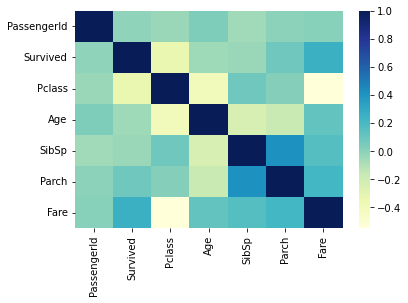

In [73]:
sns.heatmap(df.corr(), cmap = 'YlGnBu')

In [ ]:
# conclusions from the above map: 

# - The passengerID does not have any correlation with the survival of the data. 
# - Pclass: negatively correlated. i.e lower the number of Pclass, higher the chances of survival. 
# - Parch: corr value: 0.2
# - Fare: The more ppl paid for their tickets, more survival chances, It can also be seen in the Pclass and Fare corr. 

In [39]:
# applying OHE to the Sex col:

dummies = pd.get_dummies(df.Sex)

In [40]:
merged = pd.concat([df,dummies], axis = 'columns')
merged

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,female,male
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,25.0,1,2,W./C. 6607,23.4500,NaN,S,1,0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,0,1


In [41]:
final = merged.drop(['Sex'], axis = 'columns')
final

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,female,male
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,S,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C,1,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S,1,0
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,S,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",27.0,0,0,211536,13.0000,NaN,S,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",19.0,0,0,112053,30.0000,B42,S,1,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",25.0,1,2,W./C. 6607,23.4500,NaN,S,1,0
889,890,1,1,"Behr, Mr. Karl Howell",26.0,0,0,111369,30.0000,C148,C,0,1


In [76]:
final['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [ ]:
# I want to know whether any corr exists between the Embarked and Survival col or not. 
# hence applying OHE to it. 

In [77]:
dummies1 = pd.get_dummies(df.Embarked)

In [85]:
merge = pd.concat([final,dummies1], axis = 'columns')
merge

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,female,male,C,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,S,0,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C,1,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S,1,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,S,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",27.0,0,0,211536,13.0000,NaN,S,0,1,0,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",19.0,0,0,112053,30.0000,B42,S,1,0,0,0,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",25.0,1,2,W./C. 6607,23.4500,NaN,S,1,0,0,0,1
889,890,1,1,"Behr, Mr. Karl Howell",26.0,0,0,111369,30.0000,C148,C,0,1,1,0,0


In [91]:
final1 = merge.drop(['Embarked','Name','PassengerId','Ticket','Cabin'], axis = 'columns')
final1

,Survived,Pclass,Age,SibSp,Parch,Fare,female,male,C,Q,S
0,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,0,1,0,0,1
887,1,1,19.0,0,0,30.0000,1,0,0,0,1
888,0,3,25.0,1,2,23.4500,1,0,0,0,1
889,1,1,26.0,0,0,30.0000,0,1,1,0,0


In [92]:
final1.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare,female,male,C,Q,S
Survived,1.000000,-0.338481,-0.050118,-0.035322,0.081629,0.257307,0.543351,-0.543351,0.168240,0.003650,-0.149683
Pclass,-0.338481,1.000000,-0.403923,0.083081,0.018443,-0.549500,-0.131900,0.131900,-0.243292,0.221009,0.074053
Age,-0.050118,-0.403923,1.000000,-0.243110,-0.174824,0.121503,-0.079949,0.079949,0.041822,-0.071679,0.008470
SibSp,-0.035322,0.083081,-0.243110,1.000000,0.414838,0.159651,0.114631,-0.114631,-0.059528,-0.026354,0.068734
Parch,0.081629,0.018443,-0.174824,0.414838,1.000000,0.216225,0.245489,-0.245489,-0.011069,-0.081228,0.060814
Fare,0.257307,-0.549500,0.121503,0.159651,0.216225,1.000000,0.182333,-0.182333,0.269335,-0.117216,-0.162184
female,0.543351,-0.131900,-0.079949,0.114631,0.245489,0.182333,1.000000,-1.000000,0.082853,0.074115,-0.119224
male,-0.543351,0.131900,0.079949,-0.114631,-0.245489,-0.182333,-1.000000,1.000000,-0.082853,-0.074115,0.119224
C,0.168240,-0.243292,0.041822,-0.059528,-0.011069,0.269335,0.082853,-0.082853,1.000000,-0.148258,-0.782742
Q,0.003650,0.221009,-0.071679,-0.026354,-0.081228,-0.117216,0.074115,-0.074115,-0.148258,1.000000,-0.499421


<AxesSubplot:>

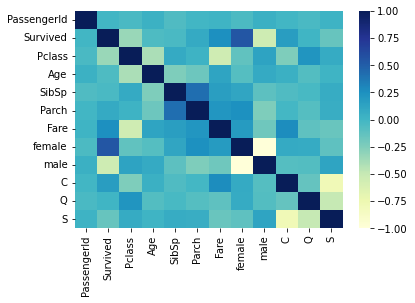

In [88]:
sns.heatmap(final1.corr(), cmap = 'YlGnBu')

In [ ]:
# Not a strong relationship. 

In [ ]:
# filtering the cols that are useful to predict the death of a person:
# Pclass, Sex, Age, SibSp, Parch, Fare, Embarked. 

In [ ]:
# splitting the dataset into training and testing data:

In [94]:
cols = final1[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'female', 'male', 'C', 'Q', 'S']]

In [95]:
predictt = final1[['Survived']]

In [ ]:
# scaling of the data is required, so that the model can handle the data efficiently. 

In [93]:
from sklearn.preprocessing import StandardScaler

In [96]:
obj = StandardScaler()

In [97]:
scale = obj.fit_transform(cols)

In [98]:
scale

array([[ 0.82737724, -0.54925917,  0.43279337, ..., -0.48204268,
        -0.30756234,  0.61583843],
       [-1.56610693,  0.66244506,  0.43279337, ...,  2.0745051 ,
        -0.30756234, -1.62380254],
       [ 0.82737724, -0.24633311, -0.4745452 , ..., -0.48204268,
        -0.30756234,  0.61583843],
       ...,
       [ 0.82737724, -0.32206462,  0.43279337, ..., -0.48204268,
        -0.30756234,  0.61583843],
       [-1.56610693, -0.24633311, -0.4745452 , ...,  2.0745051 ,
        -0.30756234, -1.62380254],
       [ 0.82737724,  0.20805597, -0.4745452 , ..., -0.48204268,
         3.25137334, -1.62380254]])

In [99]:
X_train, X_test, y_train, y_test = train_test_split(scale, predictt, test_size=0.2, random_state=10)

In [101]:
X_train.shape

(712, 10)

In [102]:
X_test.shape

(179, 10)

In [103]:
y_train.shape

(712, 1)

In [104]:
y_test.shape

(179, 1)

In [ ]:
# applying the following algorithms and will select the one with highest accuracy score.:

# SVC : 84.3%
# RandomForest : 84.3%
# KNN : 83.2%
# Logistic Regression : 80.4%

### SVC Algo:

In [89]:
from sklpredict_svc = svc_model.predict(X_test)earn.svm import SVC
svc_model = SVC()

In [105]:
svc_model.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVC()

In [106]:
predict_svc = svc_model.predict(X_test)

In [108]:
predict_svc

array([0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0], dtype=int64)

In [109]:
accuracy_score(y_test, predict_svc)

0.8435754189944135

In [110]:
confusion_matrix(y_test, predict_svc)

array([[107,  10],
       [ 18,  44]], dtype=int64)

### Random Forest Algo

In [111]:
from sklearn.ensemble import RandomForestClassifier

In [112]:
from sklearn.model_selection import GridSearchCV

In [114]:
clf = RandomForestClassifier()

In [125]:
param_grid = [
    {'n_estimators': [10,100,200,500], 'max_depth': [5,10,20], 'min_samples_split': [2,3,4,5]}
]

grid_search = GridSearchCV(clf, param_grid, cv=10, scoring='accuracy')

In [126]:
clf.fit(X_train, y_train)

C:\Users\91968\AppData\Local\Temp/ipykernel_19032/2395142735.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


RandomForestClassifier()

In [127]:
grid_search.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y wa

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [5, 10, 20],
                          'min_samples_split': [2, 3, 4, 5],
                          'n_estimators': [10, 100, 200, 500]}],
             scoring='accuracy')

In [128]:
final_param = grid_search.best_estimator_.get_params()

In [129]:
final_param

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 10,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 3,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [130]:
clf = RandomForestClassifier(n_estimators = 100, max_depth = 10, min_samples_split = 3)

In [131]:
clf.fit(X_train, y_train)

C:\Users\91968\AppData\Local\Temp/ipykernel_19032/2395142735.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


RandomForestClassifier(max_depth=10, min_samples_split=3)

In [132]:
predict_rf = clf.predict(X_test)

In [133]:
predict_rf

array([0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0], dtype=int64)

In [136]:
accuracy_score(y_test, predict_rf)

0.8435754189944135

In [137]:
confusion_matrix(y_test, predict_rf)

array([[104,  13],
       [ 15,  47]], dtype=int64)

### KNN Algo:

In [138]:
from sklearn.neighbors import KNeighborsClassifier

In [139]:
knn = KNeighborsClassifier(n_neighbors=10, metric='minkowski')

In [140]:
knn.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=10)

In [141]:
knn.score(X_test, y_test)

0.8324022346368715

### Logistic Regression Algo

In [44]:
from sklearn import linear_model

In [45]:
reg = linear_model.LinearRegression()


In [46]:
reg.fit(final[['Pclass', 'female','male', 'Age', 'SibSp', 'Parch']], final.Survived)

LinearRegression()

In [47]:
reg.predict([[1,1,0,10,0,0]])

array([1.11985799])

In [49]:
features = final[['Pclass', 'female','male', 'Age', 'SibSp', 'Parch']]

In [50]:
X = features

In [51]:
Y = final[['Survived']]

In [52]:
from sklearn.model_selection import train_test_split

In [53]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=1)
     

In [54]:
x_train.shape

(712, 6)

In [55]:
x_test.shape

(179, 6)

In [56]:
y_train.shape

(712, 1)

In [57]:
y_test.shape

(179, 1)

In [58]:
from sklearn.linear_model import LogisticRegression

In [59]:
model = LogisticRegression()

In [60]:
model.fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression()

In [65]:
predict = model.predict(x_test)

In [62]:
model.score(x_test, y_test)

0.8044692737430168

In [63]:
model.predict_proba(x_test)

array([[0.10792787, 0.89207213],
       [0.89737962, 0.10262038],
       [0.10072758, 0.89927242],
       [0.3689666 , 0.6310334 ],
       [0.06471356, 0.93528644],
       [0.87985396, 0.12014604],
       [0.79290032, 0.20709968],
       [0.09013743, 0.90986257],
       [0.52066241, 0.47933759],
       [0.46008642, 0.53991358],
       [0.89737962, 0.10262038],
       [0.37935094, 0.62064906],
       [0.7024732 , 0.2975268 ],
       [0.74041222, 0.25958778],
       [0.3689666 , 0.6310334 ],
       [0.42703438, 0.57296562],
       [0.93053634, 0.06946366],
       [0.92419451, 0.07580549],
       [0.93439684, 0.06560316],
       [0.23455729, 0.76544271],
       [0.9226481 , 0.0773519 ],
       [0.93017944, 0.06982056],
       [0.0400616 , 0.9599384 ],
       [0.63651671, 0.36348329],
       [0.34849635, 0.65150365],
       [0.90526461, 0.09473539],
       [0.06949903, 0.93050097],
       [0.2534207 , 0.7465793 ],
       [0.71403577, 0.28596423],
       [0.03678636, 0.96321364],
       [0.

In [64]:
x_test

,Pclass,female,male,Age,SibSp,Parch
862,1,1,0,48.0,0,0
223,3,0,1,25.0,0,0
84,2,1,0,17.0,0,0
680,3,1,0,25.0,0,0
535,2,1,0,7.0,0,2
...,...,...,...,...,...,...
796,1,1,0,49.0,0,0
815,1,0,1,38.0,0,0
629,3,0,1,25.0,0,0
421,3,0,1,21.0,0,0


In [ ]:
final[84:]

In [66]:
from sklearn.metrics import classification_report

In [71]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [69]:
confusion_matrix(y_test, predict)

array([[92, 14],
       [21, 52]], dtype=int64)

In [72]:
accuracy_score(y_test, predict)

0.8044692737430168